In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load data

In [5]:
infile_info = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/shared_data_Sean/info_ESMFmesh_ctsm_HCDN_nhru_final_671.buff_fix_holes_polygons_simplified_5e-4_split_nested.csv'
inpath_calib = '/glade/work/guoqiang/CTSM_cases/CAMELS_Calib/Lump_calib_split_nest_LMWG'

In [35]:
df_info = pd.read_csv(infile_info)
df_info = df_info[10::10]
df_info

,hru_id,ann_P,lon_cen,lat_cen,AREA,elev_mean,ave_T,july_T,Perimeter,distdiff,mesh_id,shp_id,shp_id_allup,shp_id_indup,file_obsQ_allup,file_obsQ_indup,file_obsQ
10,1638480,0.0,-77.67379,39.20060,2.338352e+08,175.122363,NaN,NaN,112488,0.194583,10,80,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
20,2235200,0.0,-81.56596,28.94932,3.006796e+08,21.685811,NaN,NaN,170522,0.194583,20,146,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
30,2246000,0.0,-81.96393,30.14773,4.512270e+08,32.656388,NaN,NaN,193409,0.194583,30,148,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
40,8164600,0.0,-96.96964,28.95038,2.640754e+08,38.618868,NaN,NaN,167321,0.194583,40,464,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
50,8200000,0.0,-99.29425,29.65670,2.491660e+08,472.303644,NaN,NaN,129347,0.194583,50,477,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,3364500,0.0,-85.49655,39.40363,2.424178e+08,278.096234,NaN,NaN,205317,0.194583,630,234,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
640,5514500,0.0,-91.31462,39.11872,2.410553e+09,221.377547,NaN,NaN,437459,0.194583,640,317,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
650,1639500,0.0,-77.05279,39.64560,2.671732e+08,193.505618,NaN,NaN,132187,0.194583,650,81,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...
660,6885500,0.0,-96.31728,39.77304,1.075162e+09,402.952514,NaN,NaN,292935,0.194583,660,383,NaN,NaN,NaN,NaN,/glade/p/ral/hap/common_data/camels/obs_flow_m...


In [36]:
index = np.arange(10, 671, 10)

num = len(index)
trial_num = np.zeros(num)
original_kge = np.zeros(num)
best_kge = np.zeros(num)

for i in range(len(index)):
    infile_OstModel = f'{inpath_calib}/CAMELS_{index[i]}_OstCalib/run/OstModel0.txt'
    df_OstModel = pd.read_csv(infile_OstModel, delim_whitespace=True)
    df_OstModel['obj.function'] = df_OstModel['obj.function'].values.astype(float) # some times there is NaN string
    trial_num[i] = len(df_OstModel)
    original_kge[i] = -df_OstModel.iloc[0]['obj.function']
    best_kge[i] = -df_OstModel['obj.function'].min()

# plot

In [60]:
lon, lat = df_info['lon_cen'].values, df_info['lat_cen'].values

In [68]:
def set_background(ax):
    ax.set_extent([-121, -72, 25, 50])

    # Background boundaries
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray')
    
    return ax

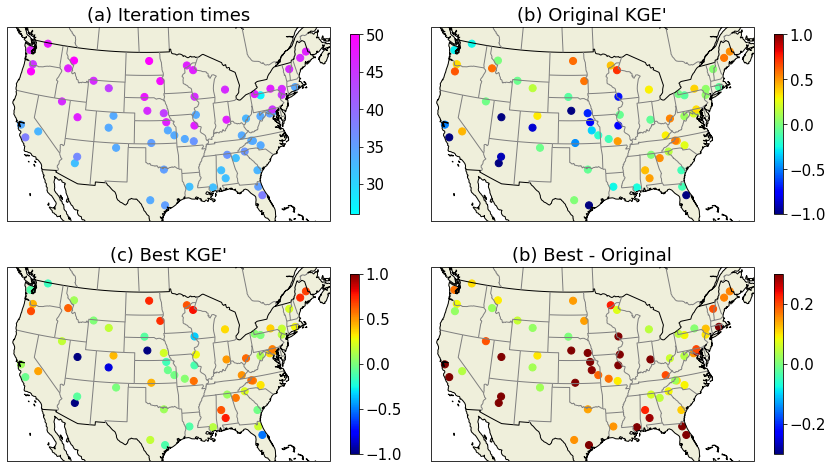

In [99]:
# map

data = [trial_num, original_kge, best_kge, best_kge - original_kge]
title = ["(a) Iteration times", "(b) Original KGE'", "(c) Best KGE'", "(b) Best - Original",]
cmaps = ['cool', 'jet', 'jet', 'jet']
lims = [ [26, 50], [-1, 1], [-1, 1], [-0.3, 0.3]]


font = {'size'   : 15}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=[12, 7])

proj = ccrs.AlbersEqualArea(central_longitude=-100)
transf = ccrs.PlateCarree()

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection=proj)
    ax = set_background(ax)
    p = ax.scatter(lon, lat, 50, data[i], cmap=cmaps[i], vmin=lims[i][0], vmax=lims[i][1], transform=transf)
    ax.set_title(title[i])
    
    cax = plt.colorbar(p, ax=ax, location='right', shrink=0.8)
    cax.ax.yaxis.set_ticks_position('right')
    cax.ax.yaxis.set_label_position('left')
    

plt.tight_layout()
plt.savefig('CAMELS_calib_kge.png', dpi=600, bbox_inches='tight', pad_inches=0)
# plt.show()